In [30]:
import pandas as pd

# Load the dataset to understand its structure
file_path = 'diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
# Check for class imbalance in the target variable
class_counts = y.value_counts()
class_counts

Outcome
0    500
1    268
Name: count, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the class distribution after resampling
print("Class distribution before resampling:")
print(y.value_counts())
print("\nClass distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution before resampling:
Outcome
0    500
1    268
Name: count, dtype: int64

Class distribution after resampling:
Outcome
1    500
0    500
Name: count, dtype: int64


c:\Users\eng20\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


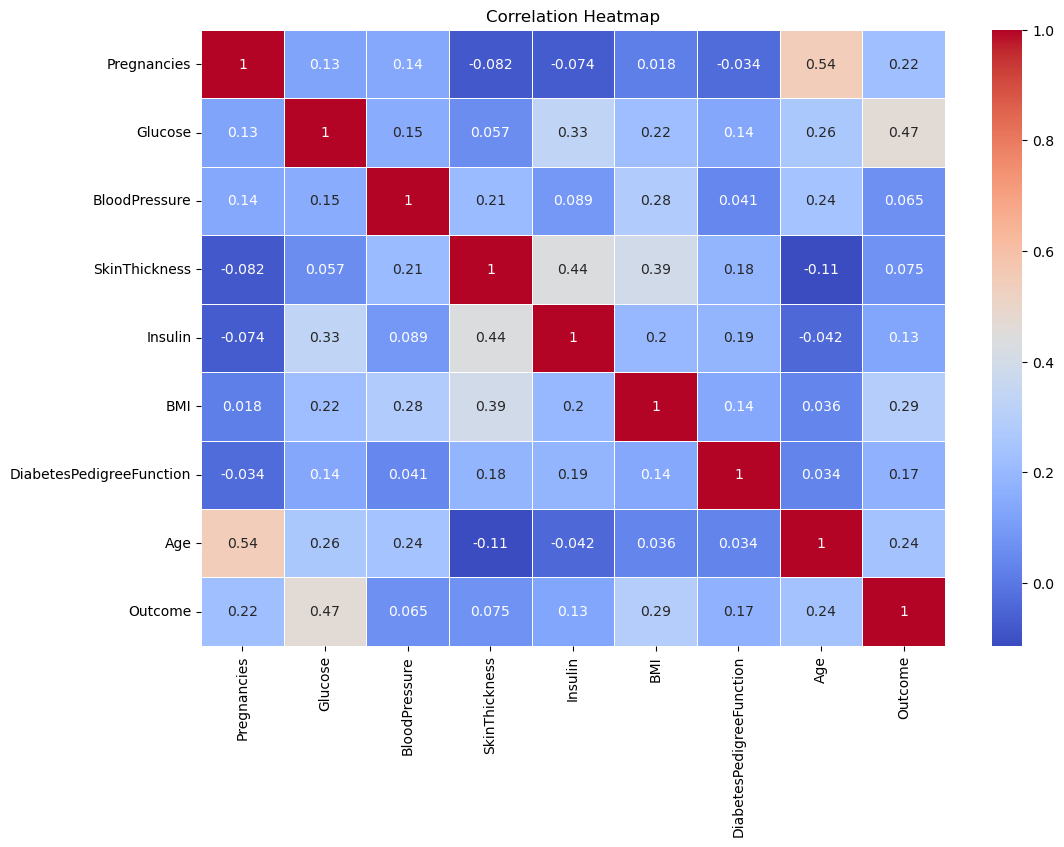

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the correlation matrix of the dataset

cor = data.select_dtypes('number').corr()

plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Selecting the most important features for a machine learning model is a crucial step in the data preprocessing pipeline. Here is a step-by-step guide on how to approach feature selection, along with some common methods and their dependencies:

### Step-by-Step Guide

1. **Understand the Data**:
   - **Domain Knowledge**: Use domain knowledge to identify which features are likely to be important.
   - **Data Exploration**: Perform exploratory data analysis (EDA) to understand the relationships between features and the target variable.

2. **Remove Irrelevant Features**:
   - **Constant Features**: Remove features that have the same value for all samples.
   - **Duplicate Features**: Remove duplicate features that provide no additional information.

3. **Handle Missing Values**:
   - **Imputation**: Fill missing values using mean, median, mode, or more sophisticated methods.
   - **Removal**: Remove features with a high percentage of missing values.

4. **Feature Selection Methods**:
   - **Filter Methods**: Select features based on statistical tests.
     - **Correlation Matrix**: Use a correlation matrix to identify highly correlated features.
     - **Chi-Square Test**: Use for categorical features to test the independence of features.
   - **Wrapper Methods**: Use a subset of features and train a model to evaluate their performance.
     - **Recursive Feature Elimination (RFE)**: Recursively remove the least important features.
     - **Forward/Backward Selection**: Add/remove features based on model performance.
   - **Embedded Methods**: Perform feature selection during the model training process.
     - **Lasso Regression**: Uses L1 regularization to shrink less important feature coefficients to zero.
     - **Tree-Based Methods**: Use feature importance scores from tree-based models like Random Forest or Gradient Boosting.

5. **Evaluate Feature Importance**:
   - **Model-Based Importance**: Train a model and use its feature importance scores.
   - **Permutation Importance**: Measure the change in model performance when a feature's values are randomly shuffled.





### Dependencies

- **Data Characteristics**: The choice of feature selection method depends on the nature of the data (e.g., numerical vs. categorical features).
- **Model Type**: Some models are more sensitive to irrelevant features (e.g., linear models) than others (e.g., tree-based models).
- **Computational Resources**: Wrapper methods can be computationally expensive, especially with large datasets.

### Other Methods

- **Principal Component Analysis (PCA)**: Reduces dimensionality by transforming features into a set of linearly uncorrelated components.
- **Mutual Information**: Measures the dependency between each feature and the target variable.

### Conclusion

Feature selection is an iterative process that involves understanding the data, applying various methods, and evaluating their impact on model performance. The choice of method depends on the specific dataset and problem at hand.

In [36]:
# Check for null values in the dataset
null_values = data.isnull().sum()
null_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

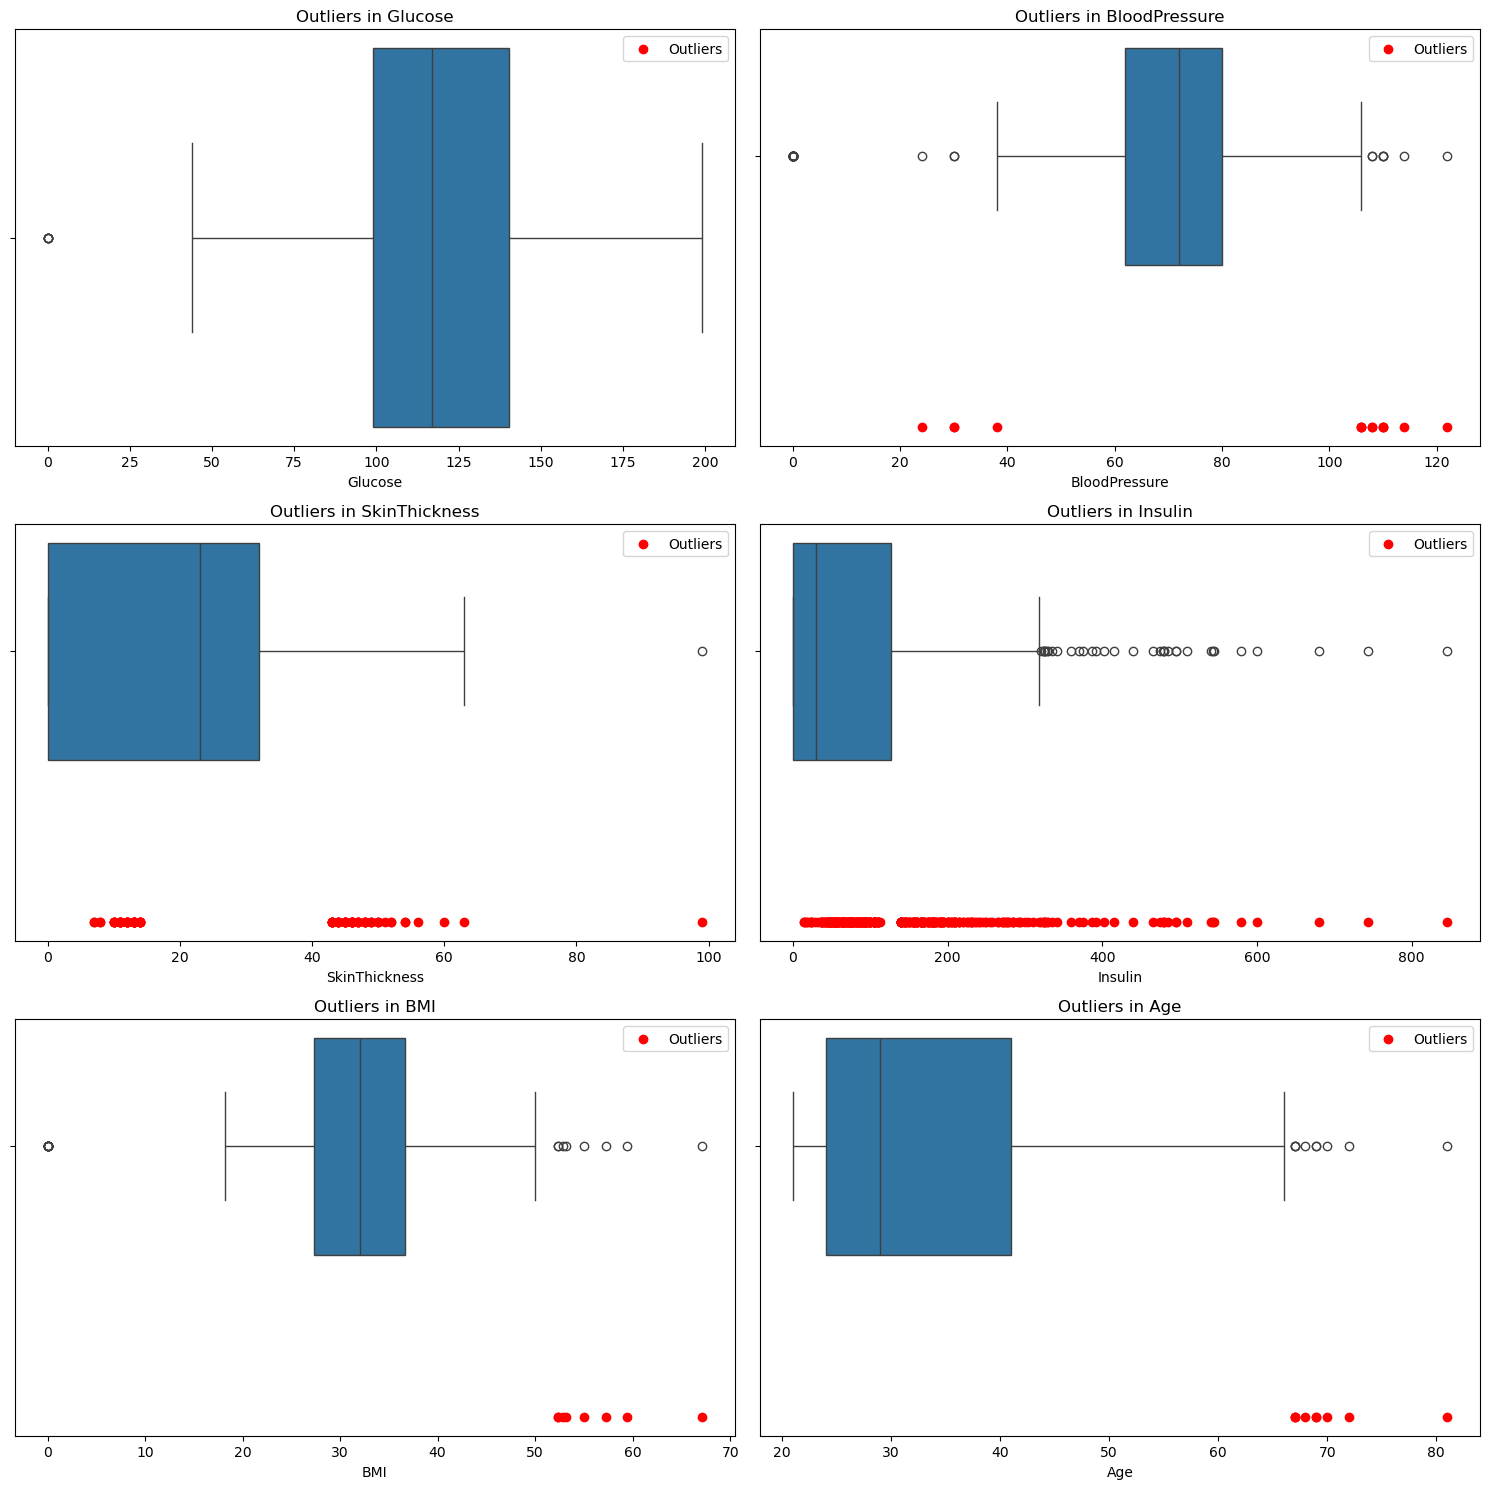

In [37]:
# Plot outliers for each column in separate plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

columns_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
outliers_data = [outliers[col] for col in columns_to_plot]

for ax, col, outlier_data in zip(axes.flatten(), columns_to_plot, outliers_data):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f'Outliers in {col}')
    ax.scatter(outlier_data[col], [1]*len(outlier_data), color='red', label='Outliers')
    ax.legend()

plt.tight_layout()
plt.show()

In [38]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove extreme outliers from relevant columns
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
for col in columns_to_check:
    data = remove_outliers(data, col)

# Display the first few rows of the updated dataset
print(data.head())

# Print the number of rows after removing outliers
print(f"Number of rows after removing outliers: {data.shape[0]}")
# Check for class imbalance in the target variable after removing outliers
class_counts_after_outliers = data['Outcome'].value_counts()
print("\nClass distribution after removing outliers:")
print(class_counts_after_outliers)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Number of rows after removing outliers: 720

Class distribution after removing outliers:
Outcome
0    475
1    245
Name: count, dtype: int64


In [ ]:

# Normalize the dataset (min-max scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Outcome', axis=1)), columns=data.columns[:-1])
data_scaled['Outcome'] = data['Outcome']

# Summary of preprocessing
outliers_summary = {col: len(outliers[col]) for col in outliers}
data_scaled.head(), outliers_summary


In [ ]:
# Drop the specified features from the dataset
features_to_drop = ['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
data_dropped = data.drop(columns=features_to_drop)

# Display the first few rows of the updated dataset
data_dropped.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier to determine feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(data.drop('Outcome', axis=1), data['Outcome'])

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=data.columns[:-1])

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Display the sorted feature importances
sorted_feature_importances

In [ ]:
# Select the top features based on feature importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


top_features = sorted_feature_importances.index[:5]  # Select top 5 features

# Split the data into features and target variable using the top features
X_top = data[top_features]
y = data['Outcome']

# Split the data into training and testing sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier using the top features
rf_model_top = RandomForestClassifier(random_state=42)
rf_model_top.fit(X_train_top, y_train_top)

# Make predictions on the test set
y_pred_top = rf_model_top.predict(X_test_top)

# Evaluate the model
accuracy_top = accuracy_score(y_test_top, y_pred_top)
classification_rep_top = classification_report(y_test_top, y_pred_top)
conf_matrix_top = confusion_matrix(y_test_top, y_pred_top)

print("Accuracy with top features:", accuracy_top)
print("\nClassification Report with top features:\n", classification_rep_top)
print("\nConfusion Matrix with top features:\n", conf_matrix_top)
# Select features with importance greater than a threshold
threshold = 0.1
important_features = sorted_feature_importances[sorted_feature_importances > threshold].index

# Split the data into features and target variable using the important features
X_important = data[important_features]
y = data['Outcome']

# Split the data into training and testing sets
X_train_important, X_test_important, y_train_important, y_test_important = train_test_split(X_important, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier using the important features
rf_model_important = RandomForestClassifier(random_state=42)
rf_model_important.fit(X_train_important, y_train_important)


In [ ]:

# Make predictions on the test set
y_pred_important = rf_model_important.predict(X_test_important)

# Evaluate the model
accuracy_important = accuracy_score(y_test_important, y_pred_important)
classification_rep_important = classification_report(y_test_important, y_pred_important)
conf_matrix_important = confusion_matrix(y_test_important, y_pred_important)

print("Accuracy with important features:", accuracy_important)
print("\nClassification Report with important features:\n", classification_rep_important)
print("\nConfusion Matrix with important features:\n", conf_matrix_important)
# Compare the performance of the models
print("Accuracy with top features:", accuracy_top)
print("\nClassification Report with top features:\n", classification_rep_top)
print("\nConfusion Matrix with top features:\n", conf_matrix_top)

print("Accuracy with important features:", accuracy_important)
print("\nClassification Report with important features:\n", classification_rep_important)
print("\nConfusion Matrix with important features:\n", conf_matrix_important)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features and target variable
X = data_scaled.drop('Outcome', axis=1)
y = data_scaled['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model  
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


In [ ]:
# Define your own input data
new_input = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [120],
    'BloodPressure': [70],
    'SkinThickness': [20],
    'Insulin': [85],
    'BMI': [30.0],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [25]
})

# Scale the input data using the same scaler used for training
new_input_scaled = scaler.transform(new_input)

# Make a prediction using the trained model
prediction = rf_model.predict(new_input_scaled)

# Output the prediction
prediction

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the model and scaler
with open('model.pkl', 'rb') as model_file:
    rf_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Define the input fields for the app
st.title("Diabetes Prediction App")
st.write("Enter the following details to predict the likelihood of diabetes:")

pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=0)
glucose = st.number_input("Glucose", min_value=0, max_value=200, value=120)
blood_pressure = st.number_input("Blood Pressure", min_value=0, max_value=150, value=70)
skin_thickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
insulin = st.number_input("Insulin", min_value=0, max_value=900, value=85)
bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=30.0)
dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.5)
age = st.number_input("Age", min_value=0, max_value=120, value=25)

# Create a dataframe for the input data
input_data = pd.DataFrame({
    'Pregnancies': [pregnancies],
    'Glucose': [glucose],
    'BloodPressure': [blood_pressure],
    'SkinThickness': [skin_thickness],
    'Insulin': [insulin],
    'BMI': [bmi],
    'DiabetesPedigreeFunction': [dpf],
    'Age': [age]
})

# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Make a prediction
prediction = rf_model.predict(input_data_scaled)

# Display the prediction
if st.button("Predict"):
    if prediction[0] == 1:
        st.write("The model predicts that the person is likely to have diabetes.")
    else:
        st.write("The model predicts that the person is not likely to have diabetes.")

In [35]:
import pickle

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
